In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [41]:
# Load dataset
file_path = "weatherHistory.csv"  # Change this to your actual dataset path
data = pd.read_csv(file_path)

In [43]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [45]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data.drop(columns=['Formatted Date'], inplace=True)

# Handle missing values in 'Precip Type' without chained assignment
data['Precip Type'] = data['Precip Type'].fillna(data['Precip Type'].mode()[0])

# Drop irrelevant column 'Loud Cover' due to lack of variability
data.drop(columns=['Loud Cover'], inplace=True)

# Ensure correlation matrix only includes numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

C:\Users\Vashani Verma\AppData\Local\Temp\ipykernel_18608\2360655936.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])


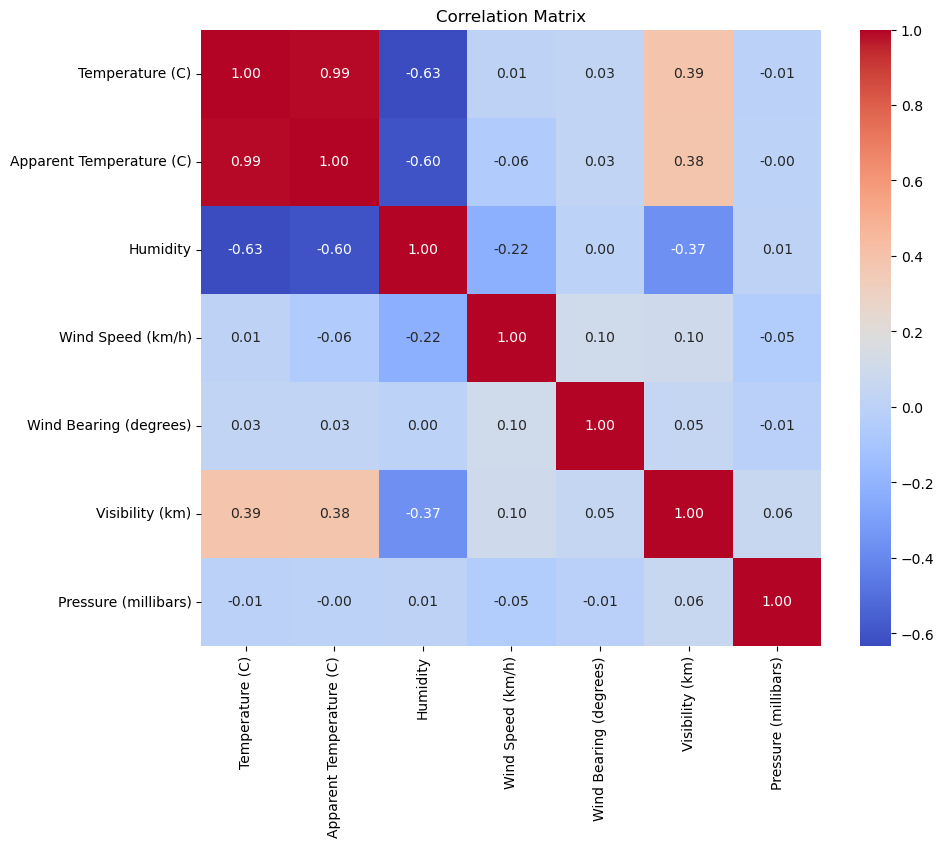

In [47]:
# Display the correlation matrix for reference
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [49]:
# Select features and define target
target = 'Temperature (C)'
features = [
    'Apparent Temperature (C)',
    'Humidity',
    'Visibility (km)',
    'Wind Speed (km/h)',
    'Pressure (millibars)'
]

In [51]:
# Step 3: Apply standard normalization (z-score normalization)
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Step 4: Split dataset into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
 #Define the MLP model with Regularization, Dropout, and Early Stopping
model = Sequential([
    Dense(128, activation='relu', input_shape=(len(features),), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1)
])

C:\Users\Vashani Verma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# Step 6: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [57]:
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)


Epoch 1/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 65.4471 - mae: 5.7194 - val_loss: 5.4211 - val_mae: 1.5691
Epoch 2/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 22.5516 - mae: 3.2568 - val_loss: 2.6251 - val_mae: 0.9144
Epoch 3/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 19.2812 - mae: 2.9667 - val_loss: 4.1241 - val_mae: 1.5292
Epoch 4/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 16.5943 - mae: 2.7530 - val_loss: 2.3579 - val_mae: 0.8975
Epoch 5/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 14.9195 - mae: 2.6055 - val_loss: 2.0929 - val_mae: 0.8106
Epoch 6/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 13.2396 - mae: 2.4373 - val_loss: 2.8118 - val_mae: 0.9615
Epoch 7/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 11.8444 - mae: 2.3208 - val_loss: 4.6107 - val_mae: 1.6824
Epoch 8/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 11.2570 - mae: 2.2675 - val_loss: 1.5534 - val_mae: 0.5403
Epoch 9/25
1930/1930 ━━━━━━━━━━

In [59]:
# Step 7: Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Test Loss: 1.5311, Test MAE: 0.5935


In [61]:
# Step 8: Visualize predictions
y_pred = model.predict(X_test)

# Step 8: Visualize predictions with different colors for predicted and actual temperatures
plt.figure(figsize=(8, 6))

603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

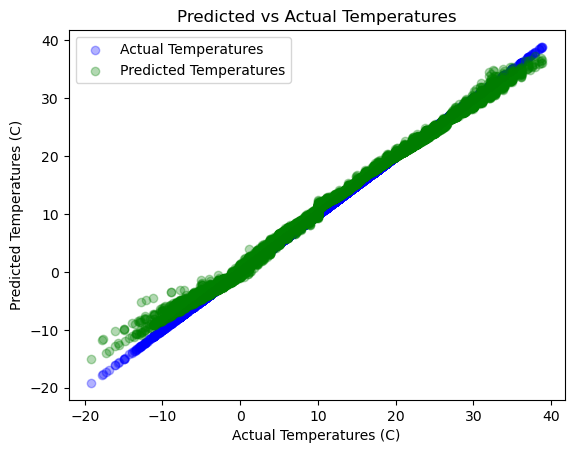

In [63]:
# Plot Actual Temperatures with reduced transparency
plt.scatter(y_test, y_test, alpha=0.3, color='blue', label="Actual Temperatures")

# Plot Predicted Temperatures with reduced transparency
plt.scatter(y_test, y_pred, alpha=0.3, color='green', label="Predicted Temperatures")

plt.xlabel("Actual Temperatures (C)")
plt.ylabel("Predicted Temperatures (C)")
plt.title("Predicted vs Actual Temperatures")
plt.legend()
plt.show()

In [104]:
# Save the trained model as an H5 file
model.save("weather_model.keras")

print("✅ Model saved as 'weather_model.h5'")

✅ Model saved as 'weather_model.h5'


In [98]:
# Function to predict temperature based on user input
def predict_temperature():
    print("\nEnter the weather details:")
    app_temp = float(input("Apparent Temperature (C): "))
    humidity = float(input("Humidity: "))
    visibility = float(input("Visibility (km): "))
    wind_speed = float(input("Wind Speed (km/h): "))
    pressure = float(input("Pressure (millibars): "))

    # Normalize input features
    user_input = scaler.transform([[app_temp, humidity, visibility, wind_speed, pressure]])

    # Predict temperature
    predicted_temp = model.predict(user_input)[0][0]
    print(f"\nPredicted Temperature: {predicted_temp:.2f}°C")

# Call the function to allow user input
predict_temperature()


Enter the weather details:


Apparent Temperature (C):  30
Humidity:  0.40
Visibility (km):  10
Wind Speed (km/h):  8
Pressure (millibars):  1011


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

Predicted Temperature: 29.33°C


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
